In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
models_precision = []
for i in range(1,5):
    epochs = []
    for j in range(5,30,5):
        model = fasttext.train_supervised("/content/drive/MyDrive/NLP_SI/tweets_2_train.txt", epoch=j, wordNgrams=i)
        d = model.test_label("/content/drive/MyDrive/NLP_SI/tweets_2_test.txt")
        epochs.append({label: value['precision'] for label, value in d.items()})
    models_precision.append(epochs)

In [ ]:
plots_data = [pd.DataFrame(precision) for precision in models_precision]

In [ ]:
for plot_data in plots_data:
    plot_data.index = range(5,30,5)
    plot_data['mean'] = plot_data.mean(axis=1)

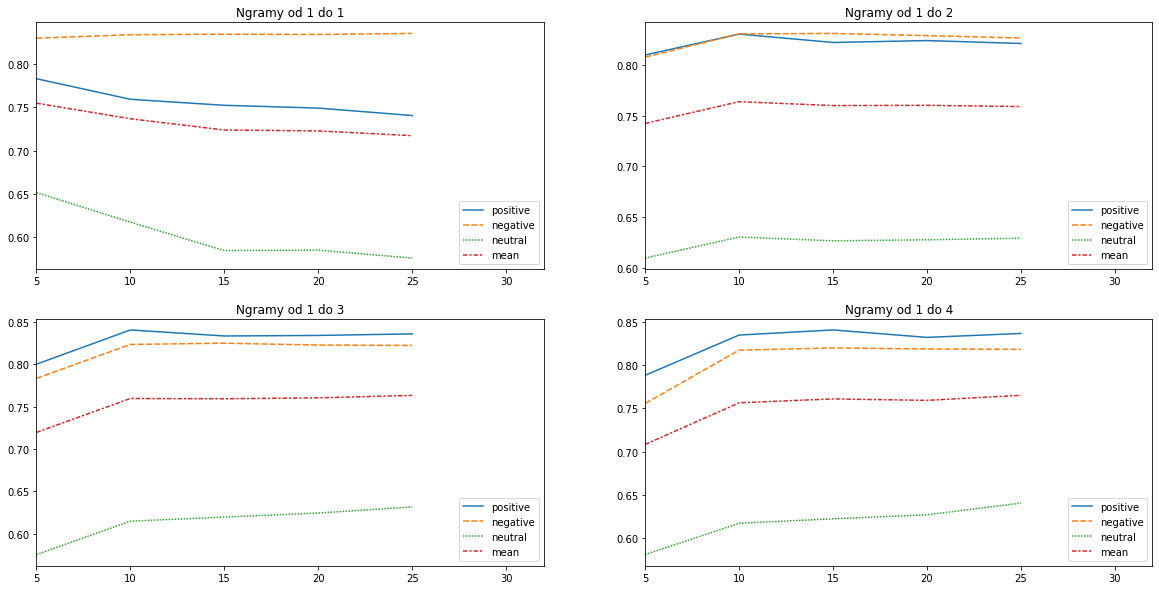

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20,10))
for i in range(4):
    sns.lineplot(data=plots_data[i], legend='brief', ax=ax[i//2][i%2]).set(xlim=(5,32))
    ax[i//2][i%2].legend([label.replace("__label__", "") for label in plots_data[i].columns], loc="lower right")
    ax[i//2][i%2].set_title(f"Ngramy od 1 do {i+1}")
plt.show()

In [ ]:
import pandas as pd
tweets = pd.read_csv(r"/content/drive/MyDrive/NLP_SI/Tweets_1.csv")

In [ ]:
tweets_test = tweets.sample(frac=0.2, random_state=42)

In [ ]:
tweets_train = tweets[~tweets.index.isin(tweets_test.index)]

Wektory znaczeniowe word2vec z biblioteki fastText

In [ ]:
import nltk
import fasttext
from nltk.corpus import stopwords
nltk.download('stopwords')
ft = fasttext.load_model('cc.en.300.bin')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import numpy as np
from nltk.corpus import stopwords

pattern = re.compile('[^A-Za-z]+')

tweets_train_vectors = []
total_difference = 0
total_length_initial = 0
for x in tweets_train[['text']].values:
  try:
    x = x[0].replace(r"\n", " ").replace(r"\r", " ")
    x_list = x.split(" ")
    total_length_initial += len(x_list)
    filtered_words = [pattern.sub('', word) for word in x_list if word not in stopwords.words('english')]
    filtered_words = [x for idx, x in enumerate(filtered_words) if x.strip() and idx != 0]
    total_difference += len(x_list) - len(filtered_words)
    tweets_train_vectors.append([ft.get_word_vector(x) for x in filtered_words])
  except ValueError:
    print(x)

In [ ]:
tweets_test_vectors = []
for x in tweets_test[['text']].values:
  try:
    x = x[0].replace(r"\n", " ").replace(r"\r", " ")
    x_list = x.split(" ")
    total_length_initial += len(x_list)
    filtered_words = [pattern.sub('', word) for word in x_list if word not in stopwords.words('english')]
    filtered_words = [x for idx, x in enumerate(filtered_words) if x.strip() and idx != 0]
    total_difference += len(x_list) - len(filtered_words)
    tweets_test_vectors.append([ft.get_word_vector(x) for x in filtered_words])
  except ValueError:
    print(x)

In [ ]:
total_length = 0
for statement in tweets_train_vectors:
  total_length += len(statement)
print(f"Average sentence length {round(total_length/len(tweets_train_vectors), 2)}")
print(f"Percent of used words {round((1 - total_difference/total_length_initial)*100, 2)}%")

Average sentence length 10.05
Percent of used words 56.65%


In [ ]:
tweets_final_vectors = {'test':{6: [], 10: [], 20: []}, 'train':{6: [], 10: [], 20: []}}
def compute_vectors(tweets_vectors, kind):
  for i in (6, 10, 20):
    zero_vectors = 0
    shrinked_vectors = 0
    for statement in tweets_vectors:
      if len(statement) < i:
        tweets_final_vectors[kind][i].append(np.array(statement+[[0] * 300]*(i-len(statement))))
        zero_vectors += i-len(statement)
      else:
        tweets_final_vectors[kind][i].append(np.array(statement[:i]))
        shrinked_vectors += len(statement) - i
    print(f"Zero vectors {zero_vectors/len(tweets_vectors)} for statement")
    print(f"Shrinked vectors {shrinked_vectors/len(tweets_vectors)} for statement")
    print()

In [ ]:
compute_vectors(tweets_train_vectors, 'train')
compute_vectors(tweets_test_vectors, 'test')

Zero vectors 0.4422814207650273 for statement
Shrinked vectors 4.495816256830601 for statement

Zero vectors 1.7307889344262295 for statement
Shrinked vectors 1.7843237704918034 for statement

Zero vectors 9.949368169398907 for statement
Shrinked vectors 0.0029030054644808745 for statement

Zero vectors 0.412568306010929 for statement
Shrinked vectors 4.60655737704918 for statement

Zero vectors 1.6461748633879782 for statement
Shrinked vectors 1.8401639344262295 for statement

Zero vectors 9.809767759562842 for statement
Shrinked vectors 0.003756830601092896 for statement



In [ ]:
from numpy import save
from numpy import asarray

In [ ]:
for key in tweets_final_vectors.keys():
  for i in tweets_final_vectors[key].keys():
    data = asarray(tweets_train_vectors_3)
    save(f'/content/drive/MyDrive/NLP_SI/data_{key}_ext_{i}.npy', data)

In [2]:
from numpy import load
import pandas as pd
base_path = '/content/drive/MyDrive/NLP_SI/'
paths = {kind: [f'data_{kind}_ext.npy', f'data_{kind}_ext_10.npy', f'data_{kind}_ext_20.npy'] for kind in ('train', 'test')}
data = [load(base_path+file_path) for file_path in paths['train']]
data_test = [load(base_path+file_path) for file_path in paths['test']]
tweets = pd.read_csv(r"/content/drive/MyDrive/NLP_SI/Tweets_1.csv")
tweets_test = tweets.sample(frac=0.2, random_state=42)
tweets_train = tweets[~tweets.index.isin(tweets_test.index)]

In [3]:
tweets_train_y = tweets_train.airline_sentiment.map({'negative': 0, 'neutral': 1, 'positive': 2}).values
tweets_test_y = tweets_test.airline_sentiment.map({'negative': 0, 'neutral': 1, 'positive': 2}).values
import numpy as np
data_y = np.zeros((tweets_train_y.size, tweets_train_y.max()+1))
data_y[np.arange(tweets_train_y.size),tweets_train_y] = 1
data_test_y = np.zeros((tweets_test_y.size, tweets_test_y.max()+1))
data_test_y[np.arange(tweets_test_y.size),tweets_test_y] = 1

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras.utils.vis_utils import plot_model
models = []

for i in (6, 10, 20):
  model = Sequential()
  model.add(layers.InputLayer(input_shape=(i,300)))
  model.add(layers.LSTM(50,dropout=0.5)) 
  model.add(layers.Dense(3,activation='softmax'))
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
  models.append(model)

In [ ]:
for i, model in zip((6, 10, 20), models):
  plot_model(model, to_file=f'model_LSTM_3_warstwy_{i}.png', show_shapes=True, show_layer_names=True)

In [ ]:
models_history = [] 
for i, (X, X_test, model) in enumerate(zip(data, data_test, models)):
  print(f'Model {i}')
  models_history.append(model.fit(X, data_y, epochs=20, validation_data=(X_test, data_test_y), verbose=True))
  print()

Model 0
Epoch 1/20
366/366 [==============================] - 23s 10ms/step - loss: 0.8369 - accuracy: 0.6480 - val_loss: 0.6694 - val_accuracy: 0.7329
Epoch 2/20
366/366 [==============================] - 3s 7ms/step - loss: 0.7106 - accuracy: 0.7007 - val_loss: 0.6228 - val_accuracy: 0.7548
Epoch 3/20
366/366 [==============================] - 3s 7ms/step - loss: 0.6796 - accuracy: 0.7185 - val_loss: 0.6181 - val_accuracy: 0.7565
Epoch 4/20
366/366 [==============================] - 3s 7ms/step - loss: 0.6662 - accuracy: 0.7230 - val_loss: 0.5953 - val_accuracy: 0.7678
Epoch 5/20
366/366 [==============================] - 3s 7ms/step - loss: 0.6523 - accuracy: 0.7310 - val_loss: 0.5915 - val_accuracy: 0.7702
Epoch 6/20
366/366 [==============================] - 3s 7ms/step - loss: 0.6291 - accuracy: 0.7409 - val_loss: 0.5824 - val_accuracy: 0.7742
Epoch 7/20
366/366 [==============================] - 3s 7ms/step - loss: 0.6364 - accuracy: 0.7373 - val_loss: 0.5775 - val_accuracy: 0.7


Model dla pierwszych 6 słów tweeta



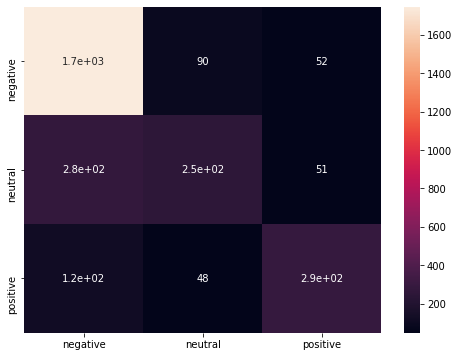

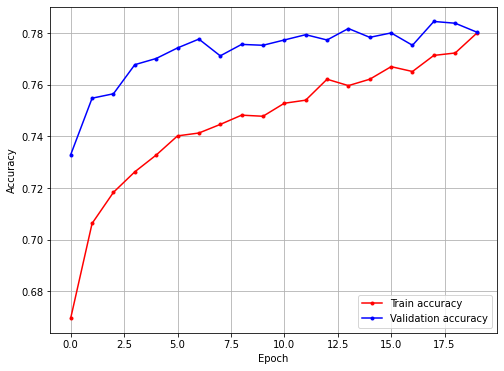


Model dla pierwszych 10 słów tweeta



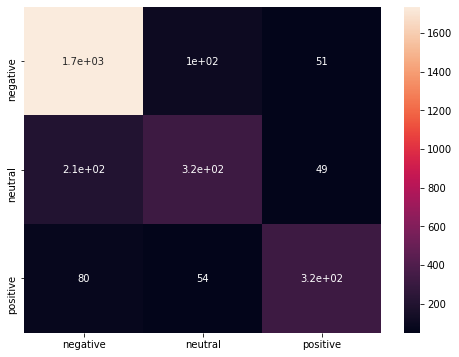

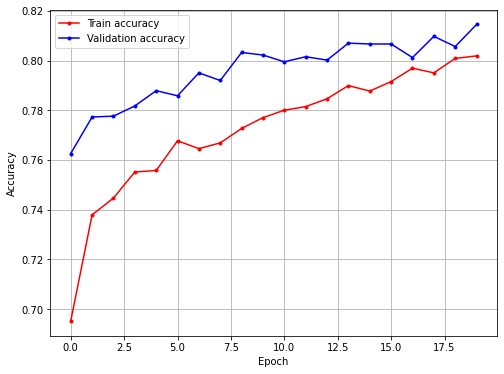


Model dla pierwszych 20 słów tweeta



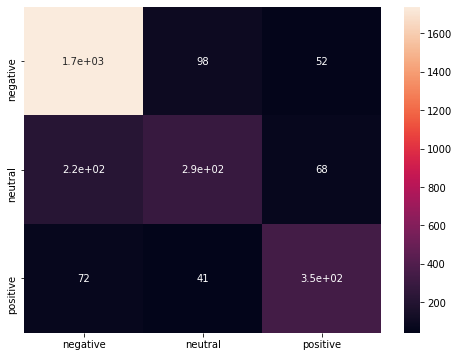

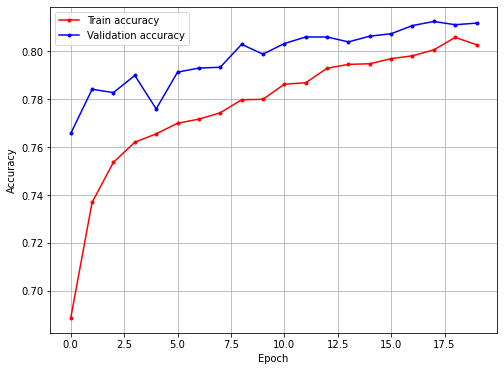

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for i, X, X_test, model, run_history in zip((6, 10, 20), data, data_test, models, models_history):
  print(f'\nModel dla pierwszych {i} słów tweeta\n')
  p = model.predict(X_test)
  y_pred = (p == p.max(axis=1)[:,None]).astype(float) 
  sns.heatmap(confusion_matrix(data_test_y.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
  plt.show()
  print()
  plt.rcParams['figure.figsize'] = (8.0, 6.0)
  plt.plot(run_history.history["accuracy"],'r', marker='.', label="Train accuracy")
  plt.plot(run_history.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
  plt.legend()
  plt.xlabel('Epoch'), plt.ylabel('Accuracy')
  plt.grid()
  plt.show()

In [ ]:
import numpy as np
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras.utils.vis_utils import plot_model
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(data_y, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

deep_model = Sequential()
deep_model.add(layers.InputLayer(input_shape=(10,300)))
deep_model.add(layers.LSTM(50,dropout=0.2)) 
deep_model.add(layers.Dense(30))
deep_model.add(layers.Dense(3,activation='softmax'))
deep_model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

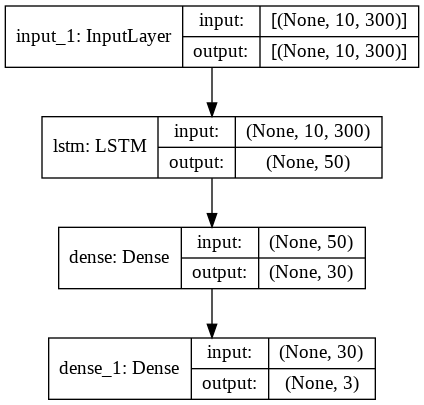

In [ ]:
plot_model(deep_model, to_file='model_LSTM_4_warstwy_10.png', show_shapes=True, show_layer_names=True)

In [ ]:
deep_model_history = deep_model.fit(data[1], data_y, epochs=20, validation_data=(data_test[1], data_test_y),class_weight=d_class_weights, verbose=True)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/20
366/366 [==============================] - 23s 12ms/step - loss: 0.8940 - accuracy: 0.6222 - val_loss: 0.6753 - val_accuracy: 0.7193
Epoch 2/20
366/366 [==============================] - 4s 10ms/step - loss: 0.7238 - accuracy: 0.6936 - val_loss: 0.6335 - val_accuracy: 0.7329
Epoch 3/20
366/366 [==============================] - 4s 10ms/step - loss: 0.6768 - accuracy: 0.7145 - val_loss: 0.5829 - val_accuracy: 0.7637
Epoch 4/20
366/366 [==============================] - 4s 10ms/step - loss: 0.6502 - accuracy: 0.7287 - val_loss: 0.6416 - val_accuracy: 0.7357
Epoch 5/20
366/366 [==============================] - 4s 10ms/step - loss: 0.6285 - accuracy: 0.7374 - val_loss: 0.6298 - val_accuracy: 0.7387
Epoch 6/20
366/366 [==============================] - 4s 10ms/step - loss: 0.6224 - accuracy: 0.7391 - val_loss: 0.6320 - val_accuracy: 0.7394
Epo


Model dla pierwszych 10 słów tweeta z warstwą gęstą i wagami klas



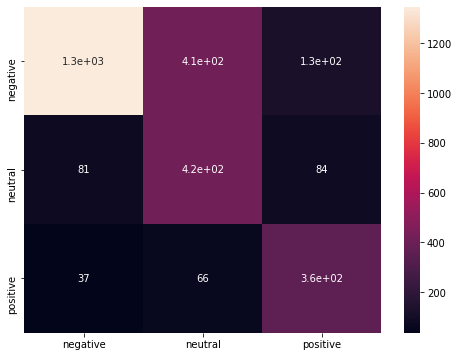

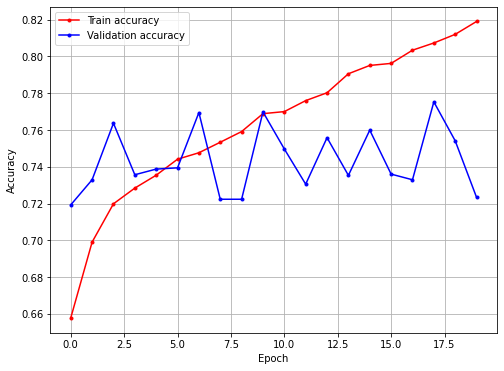

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print(f'\nModel dla pierwszych 10 słów tweeta z warstwą gęstą i wagami klas\n')
p = deep_model.predict(data_test[1])
y_pred = (p == p.max(axis=1)[:,None]).astype(float) 
sns.heatmap(confusion_matrix(data_test_y.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.show()
print()
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(deep_model_history.history["accuracy"],'r', marker='.', label="Train accuracy")
plt.plot(deep_model_history.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
deep_model_history = deep_model.fit(data[1], data_y, epochs=20, validation_data=(data_test[1], data_test_y), verbose=True)

In [ ]:
gru_model = Sequential()
gru_model.add(layers.InputLayer(input_shape=(10,300)))
gru_model.add(layers.GRU(50,dropout=0.5)) 
gru_model.add(layers.Dense(3,activation='softmax'))
gru_model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

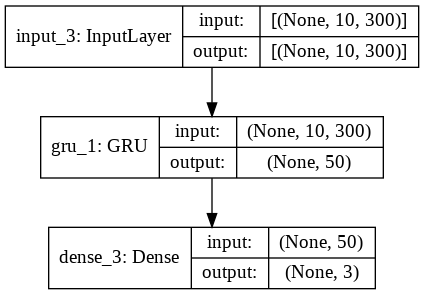

In [ ]:
plot_model(gru_model, to_file='model_GRU_3_warstwy_10.png', show_shapes=True, show_layer_names=True)

In [ ]:
deep_model_history = gru_model.fit(data[1], data_y, epochs=50, validation_data=(data_test[1], data_test_y), verbose=True)

Epoch 1/50
366/366 [==============================] - 6s 11ms/step - loss: 0.8385 - accuracy: 0.6343 - val_loss: 0.6315 - val_accuracy: 0.7483
Epoch 2/50
366/366 [==============================] - 3s 9ms/step - loss: 0.6470 - accuracy: 0.7328 - val_loss: 0.5642 - val_accuracy: 0.7814
Epoch 3/50
366/366 [==============================] - 3s 9ms/step - loss: 0.6203 - accuracy: 0.7480 - val_loss: 0.5522 - val_accuracy: 0.7865
Epoch 4/50
366/366 [==============================] - 3s 9ms/step - loss: 0.5998 - accuracy: 0.7566 - val_loss: 0.5399 - val_accuracy: 0.7889
Epoch 5/50
366/366 [==============================] - 3s 9ms/step - loss: 0.5838 - accuracy: 0.7600 - val_loss: 0.5269 - val_accuracy: 0.7927
Epoch 6/50
366/366 [==============================] - 3s 9ms/step - loss: 0.5888 - accuracy: 0.7588 - val_loss: 0.5330 - val_accuracy: 0.7869
Epoch 7/50
366/366 [==============================] - 3s 9ms/step - loss: 0.5659 - accuracy: 0.7647 - val_loss: 0.5225 - val_accuracy: 0.7917
Epoch


Model dla pierwszych 10 słów tweeta z jednostkami GRU



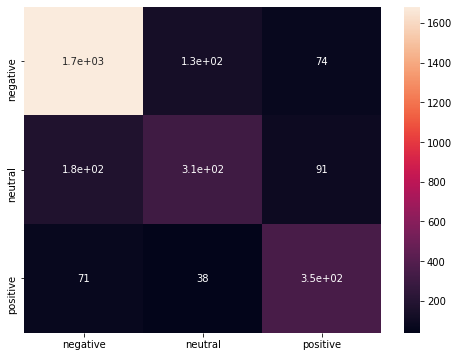

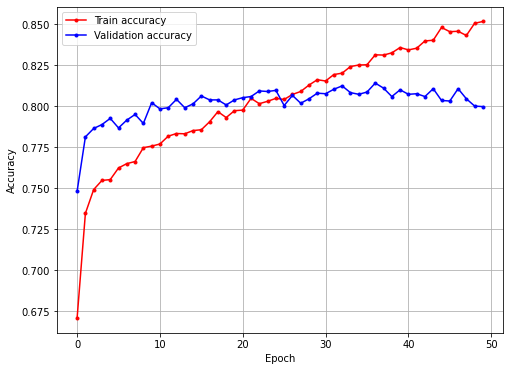

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print(f'\nModel dla pierwszych 10 słów tweeta z jednostkami GRU\n')
p = gru_model.predict(data_test[1])
y_pred = (p == p.max(axis=1)[:,None]).astype(float) 
sns.heatmap(confusion_matrix(data_test_y.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.show()
print()
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(deep_model_history.history["accuracy"],'r', marker='.', label="Train accuracy")
plt.plot(deep_model_history.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
gru_model = Sequential()
gru_model.add(layers.InputLayer(input_shape=(10,300)))
gru_model.add(layers.GRU(50,dropout=0.2))
gru_model.add(layers.Dense(30))
gru_model.add(layers.Dense(3,activation='softmax'))
gru_model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

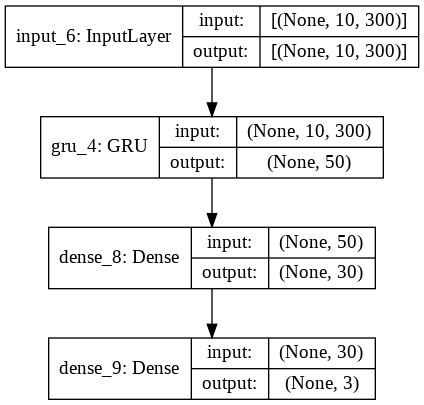

In [ ]:
plot_model(gru_model, to_file='model_GRU_4_warstwy_10.png', show_shapes=True, show_layer_names=True)

In [ ]:
deep_model_history = gru_model.fit(data[1], data_y, epochs=50, validation_data=(data_test[1], data_test_y), verbose=True)

Epoch 1/50
366/366 [==============================] - 6s 11ms/step - loss: 0.7866 - accuracy: 0.6638 - val_loss: 0.5855 - val_accuracy: 0.7602
Epoch 2/50
366/366 [==============================] - 3s 9ms/step - loss: 0.5962 - accuracy: 0.7614 - val_loss: 0.5391 - val_accuracy: 0.7883
Epoch 3/50
366/366 [==============================] - 3s 9ms/step - loss: 0.5634 - accuracy: 0.7689 - val_loss: 0.5290 - val_accuracy: 0.7900
Epoch 4/50
366/366 [==============================] - 3s 9ms/step - loss: 0.5453 - accuracy: 0.7738 - val_loss: 0.5179 - val_accuracy: 0.7927
Epoch 5/50
366/366 [==============================] - 3s 9ms/step - loss: 0.5473 - accuracy: 0.7759 - val_loss: 0.5181 - val_accuracy: 0.7961
Epoch 6/50
366/366 [==============================] - 3s 9ms/step - loss: 0.5134 - accuracy: 0.7938 - val_loss: 0.5194 - val_accuracy: 0.7951
Epoch 7/50
366/366 [==============================] - 3s 9ms/step - loss: 0.5028 - accuracy: 0.7948 - val_loss: 0.5179 - val_accuracy: 0.7958
Epoch


Model dla pierwszych 10 słów tweeta 4 warstwowy z jednostkami GRU



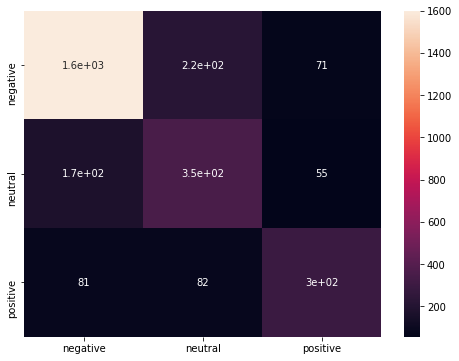

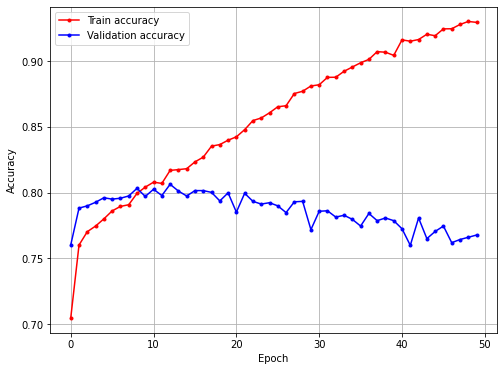

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print(f'\nModel dla pierwszych 10 słów tweeta 4 warstwowy z jednostkami GRU\n')
p = gru_model.predict(data_test[1])
y_pred = (p == p.max(axis=1)[:,None]).astype(float) 
sns.heatmap(confusion_matrix(data_test_y.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.show()
print()
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(deep_model_history.history["accuracy"],'r', marker='.', label="Train accuracy")
plt.plot(deep_model_history.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.grid()
plt.show()

Optymalizacja najlepszego modelu

In [ ]:
import numpy as np
from keras.models import Sequential
from keras import layers

model_parameters = {'dropout':{}}

for i in range(1, 6):
  print(f'Testing dropout={i*10}%')
  model = Sequential()
  model.add(layers.InputLayer(input_shape=(10,300)))
  model.add(layers.LSTM(50,dropout=i/10)) 
  model.add(layers.Dense(3,activation='softmax'))
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
  run_history = model.fit(data[1], data_y, epochs=20, validation_data=(data_test[1], data_test_y), verbose=True)
  model_parameters['dropout'][i] = max(run_history.history["val_accuracy"])
  print()

Testing dropout=10%
Epoch 1/20
366/366 [==============================] - 25s 16ms/step - loss: 0.7762 - accuracy: 0.6630 - val_loss: 0.5905 - val_accuracy: 0.7667
Epoch 2/20
366/366 [==============================] - 4s 12ms/step - loss: 0.5915 - accuracy: 0.7658 - val_loss: 0.5585 - val_accuracy: 0.7756
Epoch 3/20
366/366 [==============================] - 4s 10ms/step - loss: 0.5575 - accuracy: 0.7735 - val_loss: 0.5363 - val_accuracy: 0.7879
Epoch 4/20
366/366 [==============================] - 4s 10ms/step - loss: 0.5485 - accuracy: 0.7772 - val_loss: 0.5242 - val_accuracy: 0.7917
Epoch 5/20
366/366 [==============================] - 4s 10ms/step - loss: 0.5337 - accuracy: 0.7826 - val_loss: 0.5237 - val_accuracy: 0.7951
Epoch 6/20
366/366 [==============================] - 4s 10ms/step - loss: 0.5147 - accuracy: 0.7954 - val_loss: 0.5135 - val_accuracy: 0.7968
Epoch 7/20
366/366 [==============================] - 4s 10ms/step - loss: 0.4957 - accuracy: 0.8022 - val_loss: 0.5150 -

In [ ]:
model_parameters['dropout']
model_parameters['neurons_number'] = {}

In [ ]:
for i in range(30, 101, 10):
  print(f'Testing number of neurons = {i}')
  model = Sequential()
  model.add(layers.InputLayer(input_shape=(10,300)))
  model.add(layers.LSTM(i,dropout=0.4)) 
  model.add(layers.Dense(3,activation='softmax'))
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
  run_history = model.fit(data[1], data_y, epochs=20, validation_data=(data_test[1], data_test_y), verbose=True)
  model_parameters['neurons_number'][i] = max(run_history.history["val_accuracy"])
  print()

Testing number of neurons = 30
Epoch 1/20
366/366 [==============================] - 6s 10ms/step - loss: 0.8201 - accuracy: 0.6423 - val_loss: 0.6314 - val_accuracy: 0.7647
Epoch 2/20
366/366 [==============================] - 3s 9ms/step - loss: 0.6428 - accuracy: 0.7369 - val_loss: 0.5666 - val_accuracy: 0.7763
Epoch 3/20
366/366 [==============================] - 3s 9ms/step - loss: 0.6080 - accuracy: 0.7461 - val_loss: 0.5571 - val_accuracy: 0.7824
Epoch 4/20
366/366 [==============================] - 3s 9ms/step - loss: 0.5999 - accuracy: 0.7554 - val_loss: 0.5403 - val_accuracy: 0.7876
Epoch 5/20
366/366 [==============================] - 3s 9ms/step - loss: 0.5946 - accuracy: 0.7561 - val_loss: 0.5315 - val_accuracy: 0.7910
Epoch 6/20
366/366 [==============================] - 3s 9ms/step - loss: 0.5694 - accuracy: 0.7592 - val_loss: 0.5272 - val_accuracy: 0.7951
Epoch 7/20
366/366 [==============================] - 3s 9ms/step - loss: 0.5589 - accuracy: 0.7722 - val_loss: 0.53

In [ ]:
model_parameters['optimizer'] = {}
model_parameters

{'dropout': {1: 0.8077185750007629,
  2: 0.806693971157074,
  3: 0.813183069229126,
  4: 0.813524603843689,
  5: 0.8084016442298889},
 'neurons_number': {30: 0.8084016442298889,
  40: 0.8073770403862,
  50: 0.8159152865409851,
  60: 0.811475396156311,
  70: 0.8087431788444519,
  80: 0.8101093173027039,
  90: 0.8077185750007629,
  100: 0.8125},
 'optimizer': {}}

In [ ]:
for i in ('sgd', 'rmsprop', 'adam'):
  print(f'Testing optimizer = {i}')
  model = Sequential()
  model.add(layers.InputLayer(input_shape=(10,300)))
  model.add(layers.LSTM(50,dropout=0.4)) 
  model.add(layers.Dense(3,activation='softmax'))
  model.compile(optimizer=i,loss='categorical_crossentropy', metrics=['accuracy'])
  run_history = model.fit(data[1], data_y, epochs=20, validation_data=(data_test[1], data_test_y), verbose=True)
  model_parameters['optimizer'][i] = max(run_history.history["val_accuracy"])
  print()

Testing optimizer = sgd
Epoch 1/20
366/366 [==============================] - 7s 12ms/step - loss: 0.9614 - accuracy: 0.6108 - val_loss: 0.8765 - val_accuracy: 0.6452
Epoch 2/20
366/366 [==============================] - 4s 10ms/step - loss: 0.9020 - accuracy: 0.6208 - val_loss: 0.8675 - val_accuracy: 0.6452
Epoch 3/20
366/366 [==============================] - 4s 10ms/step - loss: 0.8853 - accuracy: 0.6245 - val_loss: 0.8585 - val_accuracy: 0.6452
Epoch 4/20
366/366 [==============================] - 4s 10ms/step - loss: 0.8752 - accuracy: 0.6266 - val_loss: 0.8485 - val_accuracy: 0.6452
Epoch 5/20
366/366 [==============================] - 4s 10ms/step - loss: 0.8688 - accuracy: 0.6182 - val_loss: 0.8355 - val_accuracy: 0.6452
Epoch 6/20
366/366 [==============================] - 4s 10ms/step - loss: 0.8579 - accuracy: 0.6222 - val_loss: 0.8181 - val_accuracy: 0.6452
Epoch 7/20
366/366 [==============================] - 4s 10ms/step - loss: 0.8474 - accuracy: 0.6191 - val_loss: 0.794

In [ ]:
model_parameters

{'dropout': {1: 0.8077185750007629,
  2: 0.806693971157074,
  3: 0.813183069229126,
  4: 0.813524603843689,
  5: 0.8084016442298889},
 'neurons_number': {30: 0.8084016442298889,
  40: 0.8073770403862,
  50: 0.8159152865409851,
  60: 0.811475396156311,
  70: 0.8087431788444519,
  80: 0.8101093173027039,
  90: 0.8077185750007629,
  100: 0.8125},
 'optimizer': {'adam': 0.8104507923126221,
  'rmsprop': 0.8101093173027039,
  'sgd': 0.7578551769256592}}

In [ ]:
sns.set_theme()

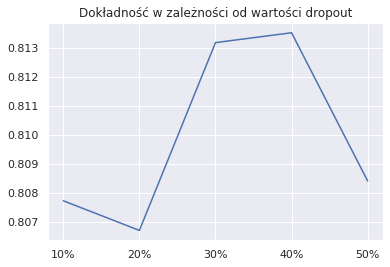

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.lineplot(data=model_parameters['dropout'], legend='brief',)
g.set_xticks([x for x in range(1, 6)])
g.set_xticklabels([f"{x*10}%" for x in range(1, 6)])
g.set_title("Dokładność w zależności od wartości dropout")
plt.show()

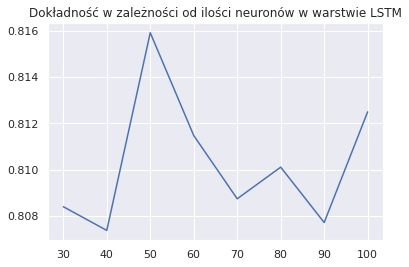

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.lineplot(data=model_parameters['neurons_number'], legend='brief',)
g.set_xticks([x for x in range(30, 101, 10)])
g.set_title("Dokładność w zależności od ilości neuronów w warstwie LSTM")
plt.show()

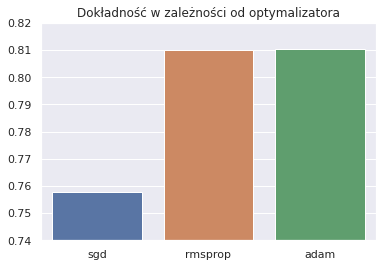

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
keys = list(model_parameters['optimizer'].keys())
vals = [model_parameters['optimizer'][k] for k in keys]
g = sns.barplot(x=keys, y=vals)
plt.ylim(0.74, 0.82)
g.set_title("Dokładność w zależności od optymalizatora")
plt.show()

In [8]:
import numpy as np
from keras.models import Sequential
from keras import layers

best_model = Sequential()
best_model.add(layers.InputLayer(input_shape=(10,300)))
best_model.add(layers.LSTM(50,dropout=0.4)) 
best_model.add(layers.Dense(3,activation='softmax'))
best_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
run_history = best_model.fit(data[1], data_y, epochs=20, validation_data=(data_test[1], data_test_y), verbose=True)

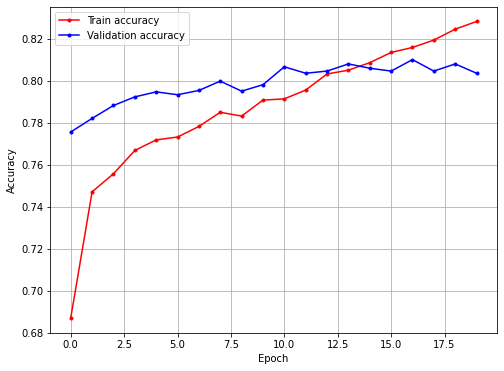

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(run_history.history["accuracy"],'r', marker='.', label="Train accuracy")
plt.plot(run_history.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Accuracy')
plt.grid()
plt.show()

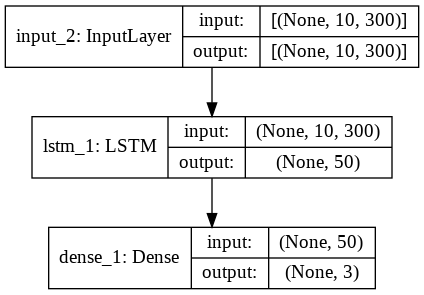

In [48]:
from keras.utils.vis_utils import plot_model
plot_model(best_model, to_file='best_model.png', show_shapes=True, show_layer_names=True)

In [34]:
probabilities = []
predicted = best_model.predict(data_test[1])
for i, idx in enumerate(np.argmax(predicted, axis=-1)):
  probabilities.append(predicted[i][idx])

In [35]:
tweets_test['predicted_sentiment'] = np.argmax(best_model.predict(data_test[1]), axis=-1)
tweets_test['predicted_sentiment'] = tweets_test['predicted_sentiment'].map({0: 'negative', 1: 'neutral', 2: 'positive'})
tweets_test['predicted_confidence'] = probabilities

In [36]:
tweets_test_errors = tweets_test.query('airline_sentiment != predicted_sentiment')

In [37]:
tweets_test_correct = tweets_test.query('airline_sentiment == predicted_sentiment')

In [42]:
print(f'Correct average length {round(tweets_test_errors.text.str.len().sum() / len(tweets_test_errors), 2)}, errors average length {round(tweets_test_correct.text.str.len().sum() / len(tweets_test_correct), 2)}')

Correct average length 97.92, errors average length 106.73


In [39]:
tweets_test_errors.sort_values(by="text", key=lambda x: x.str.len()).head(20)

,airline_sentiment,airline_sentiment_confidence,text,predicted_sentiment,predicted_confidence
4111,negative,0.6808,@united Classic,neutral,0.479459
3611,negative,0.6838,@united yes I have,neutral,0.725510
7173,positive,0.6592,@JetBlue you bet:),neutral,0.620969
12859,neutral,0.6575,@AmericanAir amen!,positive,0.526963
1795,neutral,0.6186,@united no thank you,positive,0.824032
11282,neutral,1.0000,@USAirways really!??,negative,0.455896
10495,neutral,0.6947,@USAirways Ok Thanks,positive,0.806467
13346,negative,0.6966,@AmericanAir can you?,neutral,0.772768
11257,positive,0.6802,@USAirways Will do :),neutral,0.900247
2009,neutral,0.6721,@united okay. Thanks.,positive,0.736611


In [46]:
pd.set_option('max_colwidth', -1)
tweets_test_errors.sort_values(by="predicted_confidence").head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,airline_sentiment,airline_sentiment_confidence,text,predicted_sentiment,predicted_confidence
8400,positive,0.6465,@JetBlue TA off site at #thelodge. Should be a fun day. @YeniettElswood @AndrewBiga @CodyCleverly @HeidiMacey @motherpollock,neutral,0.364895
6647,positive,1.0000,@SouthwestAir always when I fly SW. #loyalRRmember,neutral,0.368729
8641,neutral,0.6737,@JetBlue I’m getting an “it depends” vibe. Fair enough!,positive,0.371788
12174,negative,0.7148,@AmericanAir @lpalumbo what weather sun is out,neutral,0.372892
2589,negative,1.0000,@united She 👏 won't 👏 be 👏 at 👏 my 👏 wedding 👏. This is an irreplaceable milestone. There's no reFlight Booking Problems. How can we be repaid for this?,neutral,0.373476
6070,positive,0.3394,@SouthwestAir y'all the real MVP with these prices...,negative,0.379820
2554,negative,0.6556,@united I do I was on UA 495 LAX TO DEN - we are scheduled to land LAX @ 7:38 am - please rebook to Denver - best flight,neutral,0.380506
4978,negative,0.6888,"&lt;3 &lt;3 RT @SouthwestAir! @danihampton Sorry to hear about the WiFi connection, Dani. Please DM us your conf # so we can help you. Thanks!",positive,0.384754
5453,neutral,0.7172,@SouthwestAir Salted or honey roasted? I vote to bring back the salted peanuts. I dread a year of the honey roasted!😖 http://t.co/RHw78ktQFO,negative,0.389557
10103,negative,1.0000,@USAirways I packed a carry on for a reason. Thanks for making me check it. I hoped for better customer service in CLE also. #nothappy,positive,0.393360
